### <font color='blue'>Análise RFM (Recency, Frequency, Monetary Value) e Dashboard Interativo Para a Área de Marketing</font>

Link do dataset: https://www.kaggle.com/datasets/ilkeryildiz/online-retail-listing

### <font color='blue'>Instalando e Carregando os Pacotes</font>

In [1]:
# Imports
import sklearn
import squarify
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [2]:
# Carregando os dados
df = pd.read_excel("online_retail_listing.xlsx")

In [3]:
# Shape
df.shape

(1048575, 8)

In [4]:
# Primeiros documentos
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,1.25,13085.0,United Kingdom


In [5]:
# Informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [6]:
# Ajustando tipo da coluna Customer ID
df['Customer ID'] = df['Customer ID'].astype('Int64')

### <font color='blue'>Engenharia de Atributos com as Colunas do Tipo Data</font>

In [7]:
# Transformar a coluna InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y %H:%M')

In [8]:
# Extrair apenas a data da coluna InvoiceDate e criar uma nova coluna
df['InvoiceDate'] = df['InvoiceDate'].dt.date

### <font color='blue'>Agregação dos Dados Para Criação dos Parâmetros R, F e M</font>

In [9]:
# Define a data mais recente
data_mais_recente = df['InvoiceDate'].max() + timedelta(days = 1)
data_mais_recente

datetime.date(2011, 12, 5)

**df['InvoiceDate'].max()**: Esta parte do código está acessando a coluna 'InvoiceDate' em um DataFrame chamado df e encontrando a data máxima, que é a data da fatura mais recente no conjunto de dados.

**timedelta(days = 1)**: Isso cria um intervalo de tempo de um dia. A função timedelta faz parte do módulo datetime em Python e é usada para representar uma duração de tempo. Neste caso, está sendo usada para adicionar um dia à data da fatura mais recente.

O resultado é a data da fatura mais recente mais um dia.

O motivo para adicionar um dia à data da fatura mais recente é criar um ponto de referência para calcular a recência. Na análise RFM, a recência é calculada como o número de dias desde a última compra de um cliente. Ao definir a data_mais_recente para um dia após a compra mais recente no conjunto de dados, você pode calcular a recência simplesmente subtraindo a data da fatura da data_mais_recente para cada cliente, o que é feito abaixo:

In [10]:
# Agrupando por Customer ID
df_agg = df.groupby(['Customer ID']).agg({'InvoiceDate': lambda x:(data_mais_recente - x.max()).days,
                                          'Invoice': 'count',
                                          'Price': 'sum'})

In [11]:
# Renomeia as colunas
df_agg.rename(columns = {'InvoiceDate': 'Recency', 
                             'Invoice': 'Frequency', 
                             'Price': 'Monetary'}, 
              inplace = True)

In [12]:
# Visualiza
df_agg.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,321,48,580.44
12347,35,242,630.62
12348,71,51,193.10
12349,14,180,1504.59
12350,306,17,65.30


In [13]:
# Verificando se há valores ausentes
df_agg.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [14]:
# Verificando as frequências de compra
df_agg['Frequency'].value_counts().head(10)

Frequency
1     146
6      84
16     83
11     82
13     77
18     77
12     77
5      75
8      75
20     73
Name: count, dtype: int64

### <font color='blue'>Definição dos Recursos RFM Através de Análise Estatística</font>

In [15]:
# Criando labels para Recency 
r_labels = range(4, 0, -1)

In [16]:
# Atribuindo esses rótulos a 4 grupos de percentis
r_groups = pd.qcut(df_agg['Recency'], q = 4, labels = r_labels)


Este código, `r_labels = range(4, 0, -1)` e `r_groups = pd.qcut(df_agg['Recency'], q = 4, labels = r_labels)`, é usado para **categorizar os clientes em grupos com base na recência de suas compras**. Ele afeta diretamente o "R" da análise RFM (Recência, Frequência e Valor Monetário), que é uma técnica de segmentação de clientes que os agrupa com base em seu comportamento de compra.
#
## Por que usar esse código?

* **Segmentação:** Ele divide os clientes em 4 grupos, permitindo uma análise mais granular e estratégias de marketing personalizadas para cada grupo.
* **Quantidades iguais:** `pd.qcut()` garante que os grupos tenham aproximadamente o mesmo número de clientes, o que é útil para comparar o comportamento entre os grupos.
* **Rótulos intuitivos:** Os rótulos de 4 a 1 indicam a ordem de recência, sendo 4 o mais recente e 1 o menos recente, facilitando a interpidades e lançamentos.

In [17]:
r_groups.value_counts()

Recency
3    1493
4    1484
2    1475
1    1472
Name: count, dtype: int64

In [18]:
# Cria a coluna R no dataframe
df_agg = df_agg.assign(R = r_groups.values)

In [19]:
# Amostra
df_agg.sample(5)

,Recency,Frequency,Monetary,R
Customer ID,,,,
12404,678,1,63.24,1
17184,565,14,55.33,1
16237,433,7,28.90,1
15615,6,914,2343.62,4
15953,11,192,637.35,4


Para a frequência vamos trabalhar somente com 2 grupos: Grupo dos clientes que compraram apenas uma vez e grupo dos clientes que compraram mais de uma vez.

In [20]:
# Criando labels para Frequency
f_labels = range(1, 3)

In [21]:
# Função
def pct_rank_qcut(series, n):
    
    # Cria uma série de valores limite para os quantis, dividindo o intervalo [0, 1] em n partes iguais
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    
    # Define uma função que encontra o índice do primeiro valor na série de limites que é maior ou igual a x
    f = lambda x: (edges >= x).values.argmax()
    
    # Classifica a série de entrada como uma porcentagem (de 0 a 1)
    # e então aplica a função f para mapear cada valor para seu respectivo quantil
    return series.rank(pct = 1).apply(f)

In [22]:
# Atribuindo esses rótulos a 2 grupos de percentis 
f_groups = pct_rank_qcut(df_agg['Frequency'], 2)

In [23]:
f_groups.value_counts()

Frequency
2    2982
1    2942
Name: count, dtype: int64

In [24]:
# Cria a coluna F no dataframe
df_agg = df_agg.assign(F = f_groups.values)

In [25]:
# Amostra
df_agg.sample(5)

,Recency,Frequency,Monetary,R,F
Customer ID,,,,,
16362,28,104,302.35,3,2
14884,665,8,15.00,1,1
15291,21,267,1453.00,4,2
16404,66,24,131.55,3,1
17692,123,164,312.47,2,2


In [26]:
# Criando labels para Monetary
m_labels = range(1, 5)

In [27]:
# Atribuindo esses rótulos a 4 grupos de percentis
m_groups = pd.qcut(df_agg['Monetary'], q = 4, labels = m_labels)

In [28]:
m_groups.value_counts()

Monetary
1    1481
2    1481
3    1481
4    1481
Name: count, dtype: int64

In [29]:
# Cria a nova coluna M
df_agg = df_agg.assign(M = m_groups.values)

In [30]:
df_agg.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346,321,48,580.44,2,1,4
12347,35,242,630.62,3,2,4
12348,71,51,193.10,3,1,3
12349,14,180,1504.59,4,2,4
12350,306,17,65.30,2,1,1


In [31]:
# Observe os tipos de dados
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    5924 non-null   int64   
 1   Frequency  5924 non-null   int64   
 2   Monetary   5924 non-null   float64 
 3   R          5924 non-null   category
 4   F          5924 non-null   int64   
 5   M          5924 non-null   category
dtypes: category(2), float64(1), int64(3)
memory usage: 249.0 KB


### <font color='blue'>Processamento dos Dados e Label Encoding</font>

R e F foram criados como tipo category. Vamos ajustar isso.

In [32]:
# Cria o codificador
# O Label Enconding é utilizado neste caso pois há uma ordem no R e M, a ordem dos quartis, caso fosse apenas convertido para o tipo
# int, haveria um risco de perder essa ordem, e com o LabelEncoder() não há perda dessa ordem
le = LabelEncoder()

In [33]:
# Transformação de categoria para representação numérica
df_agg['R'] = le.fit_transform(df_agg['R']) + 1
df_agg['M'] = le.fit_transform(df_agg['M']) + 1

In [34]:
# Info
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5924 non-null   int64  
 1   Frequency  5924 non-null   int64  
 2   Monetary   5924 non-null   float64
 3   R          5924 non-null   int64  
 4   F          5924 non-null   int64  
 5   M          5924 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 329.8 KB


In [35]:
# Amostra
df_agg.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346,321,48,580.44,2,1,4
12347,35,242,630.62,3,2,4
12348,71,51,193.10,3,1,3
12349,14,180,1504.59,4,2,4
12350,306,17,65.30,2,1,1


### <font color='blue'>Criação dos Segmentos RFM</font>

In [36]:
# Cria o RFM Score
df_agg['Score_RFM'] = df_agg[['R','F','M']].sum(axis = 1)

In [37]:
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM
Customer ID,,,,,,,
12346,321,48,580.44,2,1,4,7
12347,35,242,630.62,3,2,4,9
12348,71,51,193.10,3,1,3,7
12349,14,180,1504.59,4,2,4,10
12350,306,17,65.30,2,1,1,4


In [38]:
# Concatenar valores de RFM para criar segmentos de RFM
def join_rfm(x):
    return str(x['R']) + str(x['R']) + str(x['M'])

In [39]:
# Aplicar a função
df_agg['Segmento_RFM'] = df_agg.apply(join_rfm, axis = 1)

In [40]:
# Visualizar
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
Customer ID,,,,,,,,
12346,321,48,580.44,2,1,4,7,2.02.04.0
12347,35,242,630.62,3,2,4,9,3.03.04.0
12348,71,51,193.10,3,1,3,7,3.03.03.0
12349,14,180,1504.59,4,2,4,10,4.04.04.0
12350,306,17,65.30,2,1,1,4,2.02.01.0


In [41]:
# Aplicar a função novamente
df_agg['Segmento_RFM'] = df_agg.apply(join_rfm, axis = 1)

In [42]:
# Visualiza
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
Customer ID,,,,,,,,
12346,321,48,580.44,2,1,4,7,224
12347,35,242,630.62,3,2,4,9,334
12348,71,51,193.10,3,1,3,7,333
12349,14,180,1504.59,4,2,4,10,444
12350,306,17,65.30,2,1,1,4,221


In [43]:
# Contamos o número de segmentos únicos
rfm_count_unique = df_agg.groupby('Segmento_RFM')['Segmento_RFM'].nunique()

In [44]:
print(rfm_count_unique.sum())

16


In [45]:
# Criamos uma cópia do dataframe
rfm = df_agg

In [46]:
# Info
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       5924 non-null   int64  
 1   Frequency     5924 non-null   int64  
 2   Monetary      5924 non-null   float64
 3   R             5924 non-null   int64  
 4   F             5924 non-null   int64  
 5   M             5924 non-null   int64  
 6   Score_RFM     5924 non-null   int64  
 7   Segmento_RFM  5924 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 422.3+ KB


In [47]:
# Ajusta o tipo de dado
rfm['Segmento_RFM'] = rfm['Segmento_RFM'].astype(str).astype(int)

In [48]:
# Info
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5924 entries, 12346 to 18287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Recency       5924 non-null   int64  
 1   Frequency     5924 non-null   int64  
 2   Monetary      5924 non-null   float64
 3   R             5924 non-null   int64  
 4   F             5924 non-null   int64  
 5   M             5924 non-null   int64  
 6   Score_RFM     5924 non-null   int64  
 7   Segmento_RFM  5924 non-null   int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 399.2 KB


### <font color='blue'>Segmentação de Clientes Usando Análise RFM</font>

In [49]:
# Describe
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM
count,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000
mean,203.204423,137.051485,505.708190,2.504558,1.503376,2.500000,6.507934,278.001350
std,209.969693,352.556699,1889.299083,1.117213,0.500031,1.118128,2.269107,123.368834
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,111.000000
25%,25.000000,20.000000,66.297500,2.000000,1.000000,1.750000,5.000000,221.000000
50%,103.000000,53.000000,173.280000,3.000000,2.000000,2.500000,6.000000,331.000000
75%,378.000000,143.000000,461.180000,4.000000,2.000000,3.250000,9.000000,441.000000
max,734.000000,12780.000000,70424.290000,4.000000,2.000000,4.000000,10.000000,444.000000


In [50]:
# Função para criar os níveis RFM
def rfm_level(df):
    
    if (df['Segmento_RFM'] >= 444 | (df['Score_RFM'] >= 9)) :
        return 'Clientes VIP'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Clientes Leais Que Compram com Frequência'
    
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Clientes Leais'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Clientes Quase Perdidos'
    
    elif ((df['Segmento_RFM'] >= 231) | (df['Score_RFM'] >= 6)):
        return 'Potenciais Clientes Leais'
    
    elif ((df['Segmento_RFM'] >= 121) & (df['R'] == 1) | (df['Score_RFM'] == 5)):
        return 'Clientes Que Precisam de Atenção'
    
    else:
        return 'Clientes Perdidos'

In [51]:
# Função para as ações RFM
def rfm_action(df):
    
    if (df['Segmento_RFM'] >= 444 | (df['Score_RFM'] >= 9)) :
        return 'Incentivos não relacionados a preços; Oferecer edição limitada e programas de fidelidade'
    
    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Oferecer itens mais caros (Upsell)'
    
    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Oferecer programas de fidelidade e venda cruzada (Cross-Sell)'
    
    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Oferecer Incentivos de preços agressivos'
    
    elif ((df['Segmento_RFM'] >= 231) | (df['Score_RFM'] >= 6)):
        return 'Recomendações de venda cruzada e cupons de desconto'
    
    elif (((df['Segmento_RFM'] >= 121) & (df['R'] == 1)) | (df['Score_RFM'] == 5)):
        return 'Incentivos de preço e oferta por tempo limitado'
    
    else:
        return 'Não gaste muito tentando readquirir esse cliente'

In [52]:
# Aplica a função e cria nova variável 'Segmento de Cliente'
rfm['Segmento de Cliente'] = rfm.apply(rfm_level, axis = 1)

In [53]:
# Aplica a função e cria uma nova variável 'Marketing Action'
rfm['Marketing Action'] = rfm.apply(rfm_action, axis = 1)

In [54]:
# Define a largura máxima da coluna para 500 caracteres
pd.set_option('display.max_colwidth', 500) 

In [55]:
# Visualiza
rfm.head(10)

,Recency,Frequency,Monetary,R,F,M,Score_RFM,Segmento_RFM,Segmento de Cliente,Marketing Action
Customer ID,,,,,,,,,,
12346,321,48,580.44,2,1,4,7,224,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de desconto
12347,35,242,630.62,3,2,4,9,334,Clientes Leais Que Compram com Frequência,Oferecer itens mais caros (Upsell)
12348,71,51,193.10,3,1,3,7,333,Potenciais Clientes Leais,Recomendações de venda cruzada e cupons de desconto
12349,14,180,1504.59,4,2,4,10,444,Clientes Leais Que Compram com Frequência,Oferecer itens mais caros (Upsell)
12350,306,17,65.30,2,1,1,4,221,Clientes Perdidos,Não gaste muito tentando readquirir esse cliente
12351,371,21,49.46,2,1,1,4,221,Clientes Perdidos,Não gaste muito tentando readquirir esse cliente
12352,32,113,2265.70,3,2,4,9,334,Clientes Leais Que Compram com Frequência,Oferecer itens mais caros (Upsell)
12353,200,24,63.08,2,1,1,4,221,Clientes Perdidos,Não gaste muito tentando readquirir esse cliente
12354,228,58,261.22,2,2,3,7,223,Clientes Leais,Oferecer programas de fidelidade e venda cruzada (Cross-Sell)


In [56]:
# Total de registros por segmento de cliente
rfm['Segmento de Cliente'].value_counts()

Segmento de Cliente
Clientes Leais                               1555
Clientes Leais Que Compram com Frequência    1372
Clientes Quase Perdidos                      1094
Potenciais Clientes Leais                    1061
Clientes Que Precisam de Atenção              467
Clientes Perdidos                             375
Name: count, dtype: int64

In [57]:
# Salva os dados em disco
rfm.to_csv("rfm.csv")

In [58]:
# Calcula os valores médios para cada segmento e o tamanho do retorno de cada segmento
rfm_level_agg = rfm.groupby(['Segmento de Cliente']).agg({'Recency': 'mean',
                                                          'Frequency' : 'mean',
                                                          'Monetary': ['mean', 'count'],
                                                          'Marketing Action' : 'unique'}).round(1)

In [59]:
# Imprime
rfm_level_agg

Recency Frequency Monetary        \
                                             mean      mean     mean count   
Segmento de Cliente                                                          
Clientes Leais                              153.6     103.0    291.5  1555   
Clientes Leais Que Compram com Frequência    54.3     424.5   1494.1  1372   
Clientes Perdidos                           233.4      13.0     33.2   375   
Clientes Quase Perdidos                     530.4      18.5     59.0  1094   
Clientes Que Precisam de Atenção            308.2      35.5    123.0   467   
Potenciais Clientes Leais                    74.2      25.9    337.6  1061   

                                                                                          Marketing Action  
                                                                                                    unique  
Segmento de Cliente                                                                                         
Clientes Leais                             [Oferecer programas de fidelidade e venda cruzada (Cross-Sell)]  
Clientes Leais Que Compram com Frequência                             [Oferecer itens mais caros (Upsell)]  
Clientes Perdidos                                       [Não gaste muito tentando readquirir esse cliente]  
Clientes Quase Perdidos                                         [Oferecer Incentivos de preços agressivos]  
Clientes Que Precisam de Atenção                         [Incentivos de preço e oferta por tempo limitado]  
Potenciais Clientes Leais                            [Recomendações de venda cruzada e cupons de desconto]

In [60]:
# Ajustando o dataframe e fazendo o reset do índice
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Segmento de Cliente Recency Frequency Monetary        \
                                                mean      mean     mean count   
0                             Clientes Leais   153.6     103.0    291.5  1555   
1  Clientes Leais Que Compram com Frequência    54.3     424.5   1494.1  1372   
2                          Clientes Perdidos   233.4      13.0     33.2   375   
3                    Clientes Quase Perdidos   530.4      18.5     59.0  1094   
4           Clientes Que Precisam de Atenção   308.2      35.5    123.0   467   
5                  Potenciais Clientes Leais    74.2      25.9    337.6  1061   

                                                  Marketing Action  
                                                            unique  
0  [Oferecer programas de fidelidade e venda cruzada (Cross-Sell)]  
1                             [Oferecer itens mais caros (Upsell)]  
2               [Não gaste muito tentando readquirir esse cliente]  
3                       [Oferecer Incentivos de preços agressivos]  
4                [Incentivos de preço e oferta por tempo limitado]  
5            [Recomendações de venda cruzada e cupons de desconto]

**Recomendações Para a Área de Negócio:**

**Clientes Leais** - São os clientes mais leais. Eles são ativos com compras frequentes e alto valor monetário. Eles podem ser os evangelistas da marca e a empresa deve se concentrar em servi-los muito bem. Eles podem ser os melhores clientes para obter feedback sobre o lançamento de qualquer novo produto ou ser os primeiros a adotar ou promover novos produtos/serviços.

**Potenciais Clientes Leais** - Alto potencial para entrar em nossos segmentos de clientes fiéis, por que não oferecer alguns brindes em sua próxima compra para mostrar que você os valoriza?

**Clientes Que Precisam de Atenção** - Mostrando sinais promissores com a quantidade e valor de sua compra, mas já faz um tempo que não compram. Vamos direcioná-los para seus itens da lista de desejos e um desconto com oferta por tempo limitado.

**Clientes Quase Perdidos** - Fizeram algumas compras iniciais, mas não voltaram desde então. Foi uma experiência ruim para o cliente? Ou adequação ao mercado do produto? Vamos gastar alguns recursos para construir o conhecimento de nossa marca com eles?

**Clientes Leais Que Compram com Frequência** - É sempre uma boa ideia tratar cuidadosamente todos os novos clientes, mas como esses clientes gastaram muito em suas compras, são ainda mais valiosos. É importante fazer com que eles se sintam valorizados e apreciados - e dar-lhes incentivos incríveis para continuar a interagir com a marca.

**Clientes VIP** - Buscam e querem mais do que preço. Programa de fidelidade ou produto/serviço exclusivo ou limitado são opções para manter esses clientes.

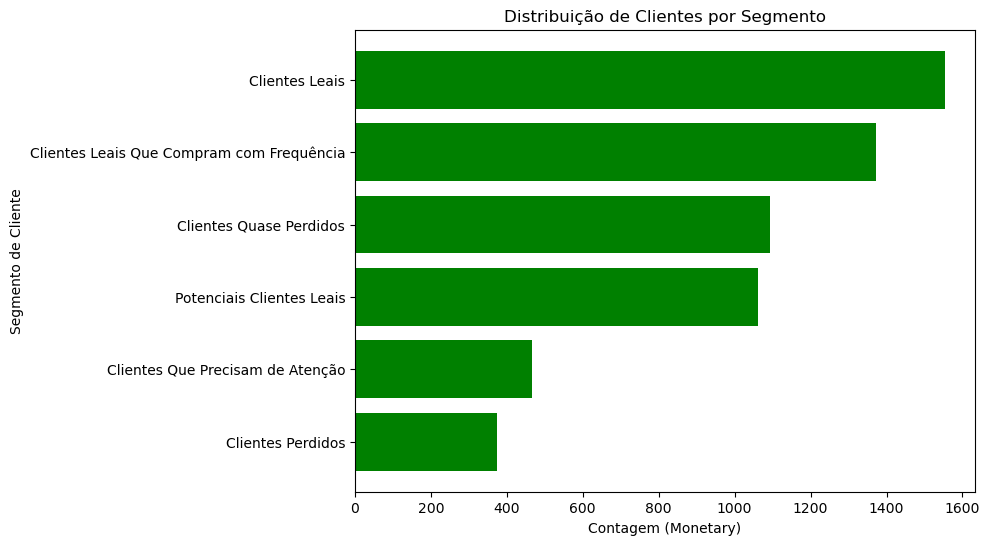

In [62]:
# Ordenar o DataFrame pelo valor de ('Monetary', 'count') em ordem crescente
rfm_level_ag_sorted = rfm_level_ag.sort_values(by=('Monetary', 'count'), ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(rfm_level_ag_sorted['Segmento de Cliente'], rfm_level_ag_sorted[('Monetary', 'count')], color='green')

# Adicionar títulos e rótulos
plt.xlabel('Contagem (Monetary)')
plt.ylabel('Segmento de Cliente')
plt.title('Distribuição de Clientes por Segmento')

# Exibir o gráfico
plt.show()


### <font color='blue'>Sistema e Versões do Pacote</font>

In [63]:
%reload_ext watermark
%watermark -v -m
%watermark --iversions

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 4
Architecture: 64bit

matplotlib: 3.8.4
pandas    : 2.2.2
squarify  : 0.4.4
sklearn   : 1.4.2
plotly    : 5.22.0
seaborn   : 0.13.2

